Sentiment analysis from a youtube video

In [29]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt

In [0]:
text = open('/content/drive/My Drive/text1.txt', encoding = 'utf-8').read()

In [0]:
lower_case = text.lower()
clean_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [0]:
tokenized_words = word_tokenize(clean_text, 'english')

In [35]:
final_words = []
for word in tokenized_words:
  if word not in stopwords.words('english'):
    final_words.append(word)

print(final_words)

['president', 'faust', 'board', 'overseers', 'faculty', 'alumni', 'friends', 'proud', 'parents', 'members', 'ad', 'board', 'graduates', 'greatest', 'university', 'world', '’', 'honored', 'today', 'let', '’', 'face', 'accomplished', 'something', 'never', 'could', 'get', 'speech', '’', 'first', 'time', 'actually', 'finish', 'something', 'harvard', 'class', '2017', 'congratulations', '’', 'unlikely', 'speaker', 'dropped', '’', 'technically', 'generation', 'walked', 'yard', 'less', 'decade', 'apart', 'studied', 'ideas', 'slept', 'ec10', 'lectures', 'may', 'taken', 'different', 'paths', 'get', 'especially', 'came', 'way', 'quad', 'today', 'want', 'share', '’', 'learned', 'generation', 'world', '’', 'building', 'together', 'first', 'last', 'couple', 'days', 'brought', 'back', 'lot', 'good', 'memories', 'many', 'remember', 'exactly', 'got', 'email', 'telling', 'got', 'harvard', 'playing', 'civilization', 'ran', 'downstairs', 'got', 'dad', 'reason', 'reaction', 'video', 'opening', 'email', 'co

In [36]:
emotion_list = []
with open('/content/drive/My Drive/emotion1.txt', 'r') as file:
  for line in file:
    clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
    word, emotion = clear_line.split(':')
    if word in final_words:
      emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' happy': 5, ' hated': 3, ' sad': 3, ' alone': 3, ' attached': 1, ' free': 1, ' attracted': 1, ' anxious': 1, ' fearful': 1, ' focused': 1, ' adequate': 1})


In [39]:
def sentiment_analyse(sentiment_text):
  score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
  if score['neg'] > score['pos']:
    print("Negative")
  elif score['pos'] > score['neg']:
    print("Positive")
  else:
    print("Neutral")    

sentiment_analyse(clean_text)  

Positive


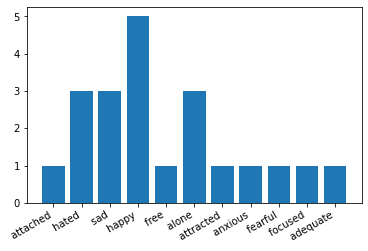

In [40]:
fig, axs = plt.subplots()
axs.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph1.png')
plt.show()